### 線性回歸

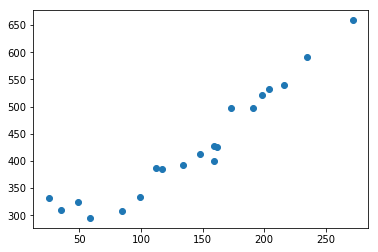

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


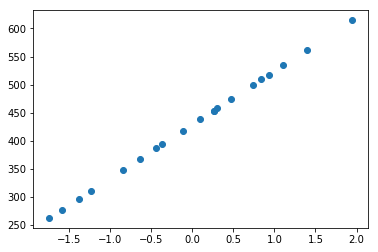

Slope: 95.564
Intercept: 428.600

MSE: 978.262
MSE: 0.903


In [2]:

##載入資料
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data=pd.read_csv('regression1.csv')
x=data.iloc[:,0].values
y=data.iloc[:,-1].values

plt.scatter(x,y)
plt.show()

##標準化
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()##定義函式
x1=x.reshape(-1,1)   ## X是一維陣列，scikit-learn希望數據存在二維陣列中
x_std=sc_x.fit_transform(x1) ##將x1帶入 標轉化


##線性回歸
from sklearn.linear_model import LinearRegression

lr=LinearRegression()##定義函式為線性回歸
lr.fit(x_std,y)      ##將 x_std 和 y 帶入 找到【回歸線】
y_pred=lr.predict(x_std) ##利用x_std帶入 預測y

plt.scatter(x_std,y_pred)
plt.show()

##找到方程式
print('Slope: %.3f' % lr.coef_[0])  ##斜率系數
print('Intercept: %.3f'% lr.intercept_)  ##截距

print()
##評估模型效能
import sklearn.metrics as sm
# MSE ：均方誤差 
print('MSE: %.3f'% sm.mean_squared_error(y,y_pred))

# R^2 ：決定係數 --> = SSR(可以解釋的部份) /SST(總共的誤差)
print('MSE: %.3f'% sm.r2_score(y,y_pred))


### 多項式迴歸

In [11]:
from sklearn.preprocessing import PolynomialFeatures

pr=LinearRegression() ##定義函式為線性回歸
quadratic=PolynomialFeatures(degree=2) #使線性回歸增加二次項
x_quad=quadratic.fit_transform(x_std)  #將x進行交互作用

pr.fit(x_quad,y)  #把xy放入回歸訓練
y_quad_pred=pr.predict(x_quad) #用x預測y

print('theta1 : %.3f' % pr.coef_[1])
print('theta1 : %.3f' % pr.coef_[2])
print('intercept : %.3f' % pr.intercept_)

theta_pr=[pr.intercept_,pr.coef_[2],pr.coef_[1]]
theta_lr=[lr.intercept_,lr.coef_[0]]

theta1 : 97.133
theta1 : 22.623
intercept : 405.977


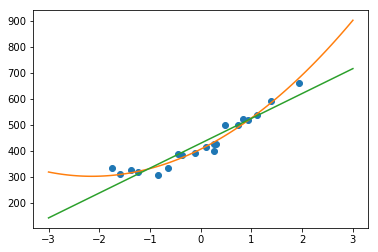

In [28]:
#迴歸線畫法：

#1：定義x範圍
t=np.linspace(-3,3,100)

theta_pr=[pr.intercept_,pr.coef_[1],pr.coef_[2]]
theta_lr=[lr.intercept_,lr.coef_[0]]


#2：畫出資料點
plt.plot(x_std,y,'o')

#3：迴歸線(x範圍,帶入的值)
plt.plot(t,theta_pr[0]+theta_pr[1]*t+theta_pr[2]*t**2)
plt.plot(t,theta_lr[0]+theta_lr[1]*t)
plt.show()

### 作業

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('regression.csv')
x=data.iloc[:,0].values
y=data.iloc[:,1].values

#查看資料的相關係數
data.corr()

,X,y
X,1.000000,0.949494
y,0.949494,1.000000


In [45]:
data.show()

AttributeError: show

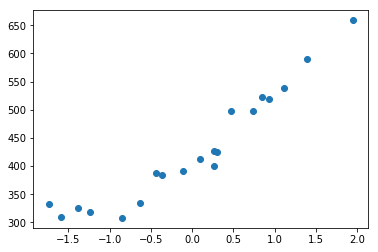

In [16]:
plt.plot(x,y,'o')
plt.show()

In [19]:
def f(x):
    return theta[0]+theta[1]*x    ##每一次調整完的迴歸線

def computeCost(x,y):
    return np.sum(((f(x)-y)**2)/2)  ##距離平方總和的1/2
      
eta=0.01
count=200
theta=[0,0]
temp=[0,0]
error=[]   #每一次cost function的值
    
for i in range (1,count+1,1):
    temp[0]=temp[0]-eta*np.sum(f(x)-y)     #預測值-原始值=距離 的總和
    temp[1]=temp[1]-eta*np.sum((f(x)-y)*x) #(預測值-原始值)*x 的總和
    theta=temp
    error.append(computeCost(x,y))
    log='{}次 :  theta0={:.3f}  ,  theta1={:.3f}'
    print(log.format(i,theta[0],theta[1]))    
        
            

1次 :  theta0=85.830  ,  theta1=18.696
2次 :  theta0=154.494  ,  theta1=33.652
3次 :  theta0=209.425  ,  theta1=45.618
4次 :  theta0=253.370  ,  theta1=55.190
5次 :  theta0=288.526  ,  theta1=62.848
6次 :  theta0=316.651  ,  theta1=68.974
7次 :  theta0=339.151  ,  theta1=73.875
8次 :  theta0=357.151  ,  theta1=77.796
9次 :  theta0=371.550  ,  theta1=80.932
10次 :  theta0=383.070  ,  theta1=83.442
11次 :  theta0=392.286  ,  theta1=85.449
12次 :  theta0=399.659  ,  theta1=87.055
13次 :  theta0=405.557  ,  theta1=88.340
14次 :  theta0=410.276  ,  theta1=89.368
15次 :  theta0=414.051  ,  theta1=90.190
16次 :  theta0=417.071  ,  theta1=90.848
17次 :  theta0=419.486  ,  theta1=91.374
18次 :  theta0=421.419  ,  theta1=91.795
19次 :  theta0=422.965  ,  theta1=92.132
20次 :  theta0=424.202  ,  theta1=92.401
21次 :  theta0=425.192  ,  theta1=92.617
22次 :  theta0=425.983  ,  theta1=92.789
23次 :  theta0=426.617  ,  theta1=92.927
24次 :  theta0=427.123  ,  theta1=93.037
25次 :  theta0=427.529  ,  theta1=93.126
26次 :  the

In [20]:
theta[0],theta[1]

(429.15005982643174, 93.478799745270535)

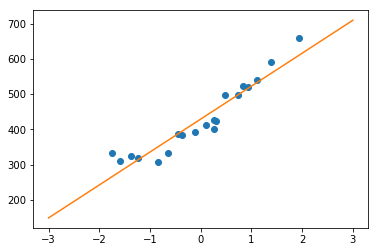

In [23]:
t=np.linspace(-3,3,100)  #定義一個x範圍
plt.plot(x,y,'o')
plt.plot(t,f(t)) ##迴歸線(x範圍,x帶入迴歸線)
plt.show()

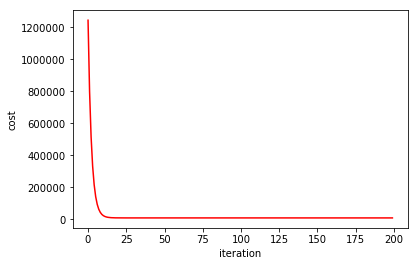

In [26]:
t=np.linspace(1,202)   #給一個x的範圍
plt.plot(error,'r-')   #每一次迴圈cost function的值
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

### 複迴歸

In [33]:
from sklearn.datasets import load_diabetes

data=load_diabetes()
data.keys()

import pandas as pd

feature = pd.DataFrame(data['data'],columns=data['feature_names'])
target=pd.DataFrame(data['target'],columns=['target'])

df=pd.concat([feature,target],axis=1)

In [30]:
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

#### 1. 散點圖

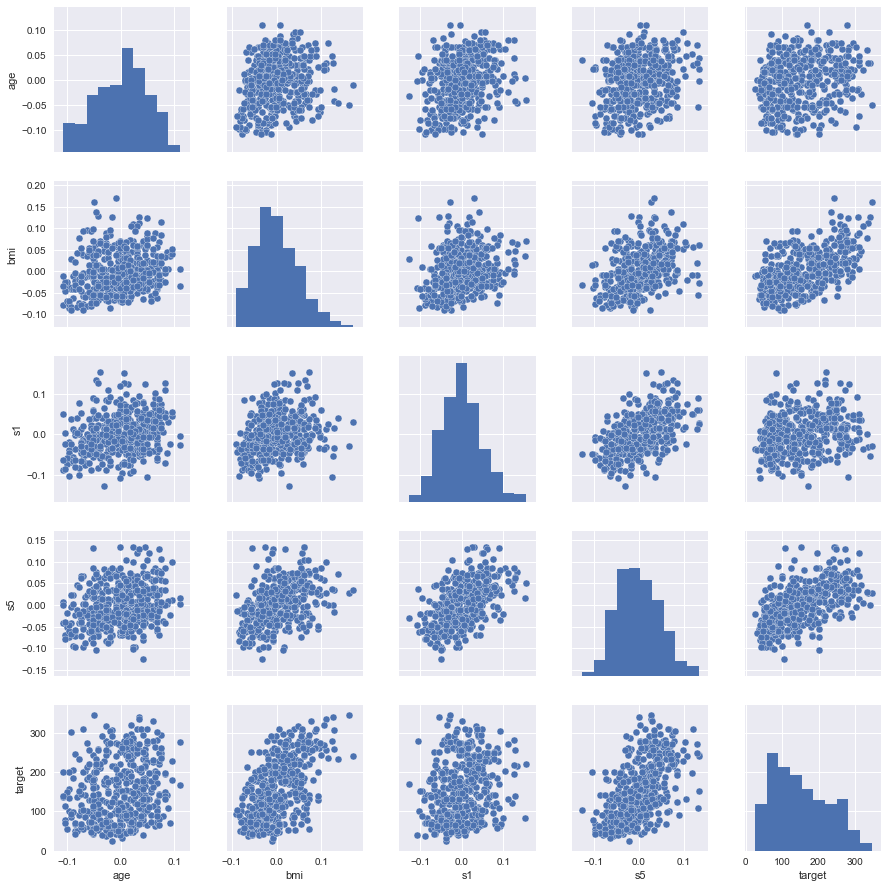

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


#定義要畫的欄位
cols=['age','bmi','s1','s5','target']

#畫圖：sns.pairplot(欄位)
sns.pairplot(df[cols])  ##子圖合併

plt.tight_layout()#圖表過度集中，可用.tight_layout分開  

#儲存圖片
#plt.savefig('scatterplot.png',dpi=300)
plt.show()

#### 2.熱度圖

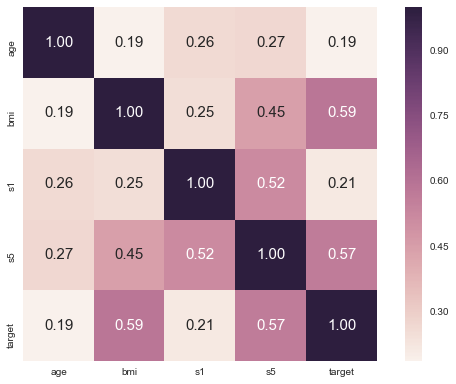

In [36]:
import numpy as np

#算相關係數  np.corrcoef(欄位值.T)
cm=np.corrcoef(df[cols].values.T)#.T 轉置


#熱度圖
sns.heatmap(cm,
            cbar=True,   #右邊顏色
            annot=True,  #數字標記
            square=True, #正方形
            fmt='.2f',   #format格式化
            annot_kws={'size':15},  #字大小
            yticklabels=cols,  
            xticklabels=cols)


plt.tight_layout()
#plt.savefig('correlation.png',dpi=300)
plt.show()


#### 3.線性迴歸

In [41]:
#1.分成tain和 test
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

#資料讀取成 data=x 和 target=y
X,y = load_diabetes().data, load_diabetes().target
#切割
X_train, X_test , y_train , y_test = train_test_split(X , y , random_state=8)



#2.線性迴歸
from sklearn.linear_model import LinearRegression

slr=LinearRegression() #定義函式
slr.fit(X_train , y_train) #帶入TRAIN

print('相關係數',slr.coef_)  #迴歸係數-->形成方程式

y_train_pred=slr.predict(X_train) #訓練的預測值
y_test_pred=slr.predict(X_test)   #測試的預測值



#3.MSE & R^2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MSE train: %.3f,test:%.3f' % (
    mean_squared_error(y_train, y_train_pred),
     mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f,test:%.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))


相關係數 [   11.5106203   -282.51347161   534.20455671   401.73142674 -1043.89718398
   634.92464089   186.43262636   204.93373199   762.47149733    91.9460394 ]
MSE train: 2812.369,test:3108.041
R^2 train: 0.530,test:0.459


---
note1：x要先標準化  
note2：迴歸係數絕對值越大、對y影響力越大   
note3：迴歸係數為負，表示負相關

---

#### - 刪除s1欄位

MSE train: 2853.339, test: 3070.322     
R^2 train: 0.524, test: 0.466
        
#### - 與沒有刪除的比較：
刪除前：R^2 train: 0.530,test:0.459   【過度配適】   
刪除後：R^2 train: 0.524, test: 0.466 【稍好一點的過度配適】

#### - 結論：
train和test的R^2有接近的趨勢，因此 刪除後的模型較好。

# 解決共線性

- 1.資料愈處理(轉換、留下獨立變數)
- 2.脊迴歸
- 3.LASSO 最小絕對壓縮挑選機制
- 4.主成分分析

## 脊回歸 Ridge模型

- 提⾼α值，降低 overfitting
- 非常⼩的 α 值，會使結果很接近線性迴歸
- 增加α會降低係數，使其趨近於０，降低訓練集的分數，但有助於泛化

In [51]:
from sklearn.linear_model import Ridge

#訓練模型=定義函式.fit(值帶入)
ridge=Ridge(alpha=1).fit(X_train,y_train)
#迴歸係數
#print(ridge.coef_)
#x帶入預測y
y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print()
#實際與預測的誤差( y, y_pred)
#y_train , y_train_pred 
#y_test , y_test_pred
print('MSE train: %.3f, test: %.3f' %( 
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %(
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred)))
print('#最佳模型')


MSE train: 3397.720, test: 3262.233
R^2 train: 0.433, test: 0.433
#最佳模型


In [52]:
from sklearn.linear_model import Ridge

#訓練模型=定義函式.fit(值帶入)
ridge=Ridge(alpha=10).fit(X_train,y_train)
#迴歸係數
#print(ridge.coef_)
#x帶入預測y
y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print()
#實際與預測的誤差( y, y_pred)
#y_train , y_train_pred 
#y_test , y_test_pred
print('MSE train: %.3f, test: %.3f' %( 
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %( 
    r2_score(y_train,y_train_pred)
    ,r2_score(y_test,y_test_pred)))
print('#undderfitting')


MSE train: 5083.146, test: 4817.252
R^2 train: 0.151, test: 0.162
#undderfitting


In [53]:
from sklearn.linear_model import Ridge

#訓練模型=定義函式.fit(值帶入)
ridge=Ridge(alpha=0.1).fit(X_train,y_train)
#迴歸係數
#print(ridge.coef_)
#x帶入預測y
y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print()
#實際與預測的誤差( y, y_pred)
#y_train , y_train_pred 
#y_test , y_test_pred
print('MSE train: %.3f, test: %.3f' %( 
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %( 
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred)))
print('#overfitting')


MSE train: 2865.170, test: 3027.227
R^2 train: 0.522, test: 0.473
#overfitting


## LASSO

- 使某些係數變為０
- 降低 α 後，模型的分數⼤幅增加，模型較複雜
- 非常⼩的 α 值，使⽤了全部特徵，會使結果很接近線性迴歸

- 缺點：移除變數的同時，會犧牲模型的正確性
- 使用時機：
  - 特徵太多，且只有⼀⼩部分是真正重要的
  - 須解釋模型時更好理解，因為使⽤較少特徵

In [62]:
# 使用 LASSO
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
#定義.fit(值代入)
lasso=Lasso(alpha=1).fit(X_train,y_train)
print(lasso.coef_)

#x代入預測y
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

print('---只用三個特徵---')
print('MSE train: %.3f, test: %.3f' %( 
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %( 
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred)))
print('#underfitting')

[   0.           -0.          384.73421807   72.69325545    0.            0.
   -0.            0.          247.88881314    0.        ]
---只用三個特徵---
MSE train: 3818.201, test: 3646.836
R^2 train: 0.362, test: 0.366
#underfitting


In [61]:
# 使用 LASSO
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
#定義.fit(值代入)
lasso=Lasso(alpha=0.1).fit(X_train,y_train)
print(lasso.coef_)

#x代入預測y
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

print('---用了七個特徵---')
print('MSE train: %.3f, test: %.3f' %( 
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %( 
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred)))
print('#underfitting')

[   0.         -181.40911617  537.71961152  355.19720303 -105.43471481
   -0.         -198.99829878    0.          440.25133426   48.25573121]
---用了七個特徵---
MSE train: 2877.650, test: 2989.599
R^2 train: 0.519, test: 0.480
#underfitting


In [65]:
# 使用 LASSO
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
#定義.fit(值代入)
lasso=Lasso(alpha=0.001).fit(X_train,y_train)
print(lasso.coef_)

#x代入預測y
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

print('---用了10個特徵---')
print('MSE train: %.3f, test: %.3f' %( 
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %( 
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred)))
print('#overfitting,接近線性迴歸')

[  11.82931254 -281.06324599  534.59556593  401.25597128 -971.04936503
  579.28119134  151.83257187  191.85084436  736.83680063   91.17487055]
---用了10個特徵---
MSE train: 2812.574, test: 3102.099
R^2 train: 0.530, test: 0.460
#overfitting,接近線性迴歸


## Elastic Net 彈性網

優點:  
- 簡單、直覺、易運算 
- 好解釋

缺點:  
- 易受異常值影響
- 相關預測因子的權重會被扭曲
- 曲線趨勢


In [67]:
# 彈性網 Elastic Net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#模型.fit(值代入)
#alpha-->ridge  //  l1_ratio-->LASSO
elanet=ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train,y_train)
print(elanet.coef_)

y_train_pred=elanet.predict(X_train)
print('---9個值---')
print('MSE train: %.3f, test: %.3f' %( 
    mean_squared_error(y_train,y_train_pred)
    ,mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %( 
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred)))
print('underfitting')

[ 0.21886047  0.          3.32172605  2.40903271  0.39329589  0.0813468
 -1.66664402  1.86756919  3.0113635   1.88112395]
---9個值---
MSE train: 5937.607, test: 3102.099
R^2 train: 0.009, test: 0.460
underfitting
